<a href="https://colab.research.google.com/github/divyasri27k/Data-Science-Project-Code-Soft/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK-5: CREDIT CARD FRAUD DETECTION

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [2]:
data = pd.read_csv('/content/creditcard_2023.csv',sep=',')
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5523 entries, 0 to 5522
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      5523 non-null   int64  
 1   V1      5523 non-null   float64
 2   V2      5523 non-null   float64
 3   V3      5523 non-null   float64
 4   V4      5523 non-null   float64
 5   V5      5523 non-null   float64
 6   V6      5523 non-null   float64
 7   V7      5523 non-null   float64
 8   V8      5523 non-null   float64
 9   V9      5523 non-null   float64
 10  V10     5523 non-null   float64
 11  V11     5522 non-null   float64
 12  V12     5522 non-null   float64
 13  V13     5522 non-null   float64
 14  V14     5522 non-null   float64
 15  V15     5522 non-null   float64
 16  V16     5522 non-null   float64
 17  V17     5522 non-null   float64
 18  V18     5522 non-null   float64
 19  V19     5522 non-null   float64
 20  V20     5522 non-null   float64
 21  V21     5522 non-null   float64
 22  

In [4]:

data.isnull().values.any()

True

Text(0, 0.5, 'Frequency')

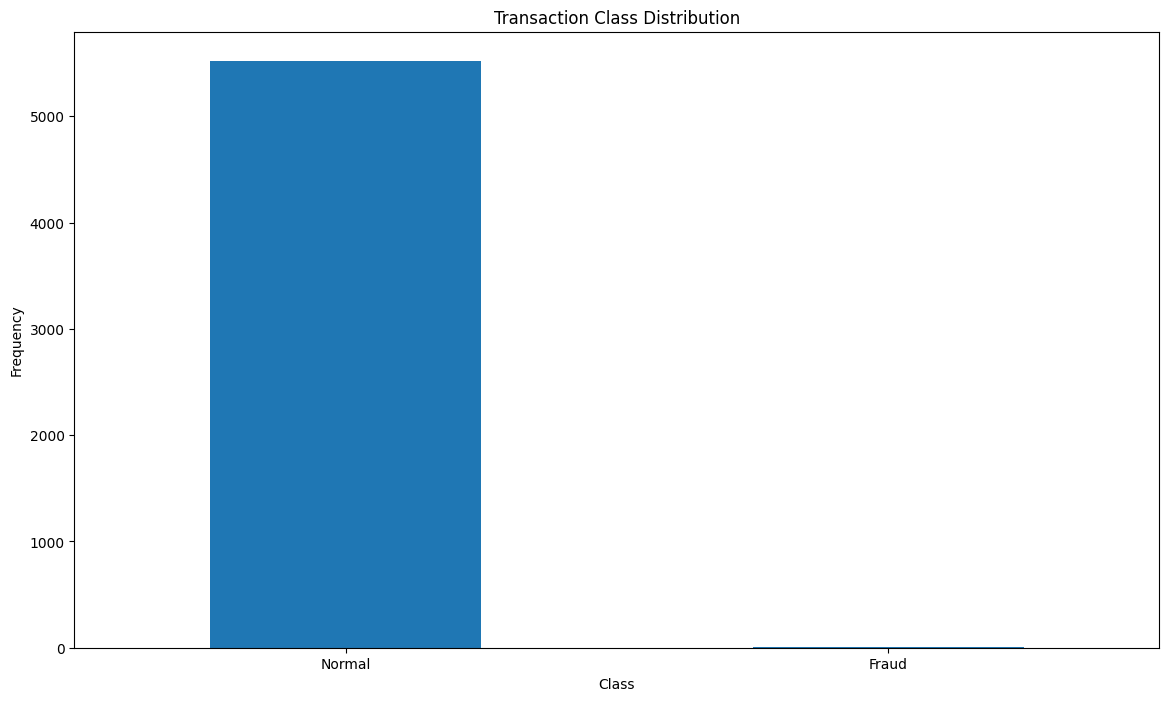

In [5]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [6]:
## Get the Fraud and the normal dataset

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [7]:
print(fraud.shape,normal.shape)

(3, 31) (5519, 31)


In [8]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.Amount.describe()


count        3.000000
mean      4958.396667
std       4886.749649
min       1534.530000
25%       2160.255000
50%       2785.980000
75%       6670.330000
max      10554.680000
Name: Amount, dtype: float64

In [9]:
normal.Amount.describe()

count     5519.000000
mean     11971.439288
std       6943.353681
min         50.530000
25%       5951.235000
50%      11741.700000
75%      18011.965000
max      24033.590000
Name: Amount, dtype: float64

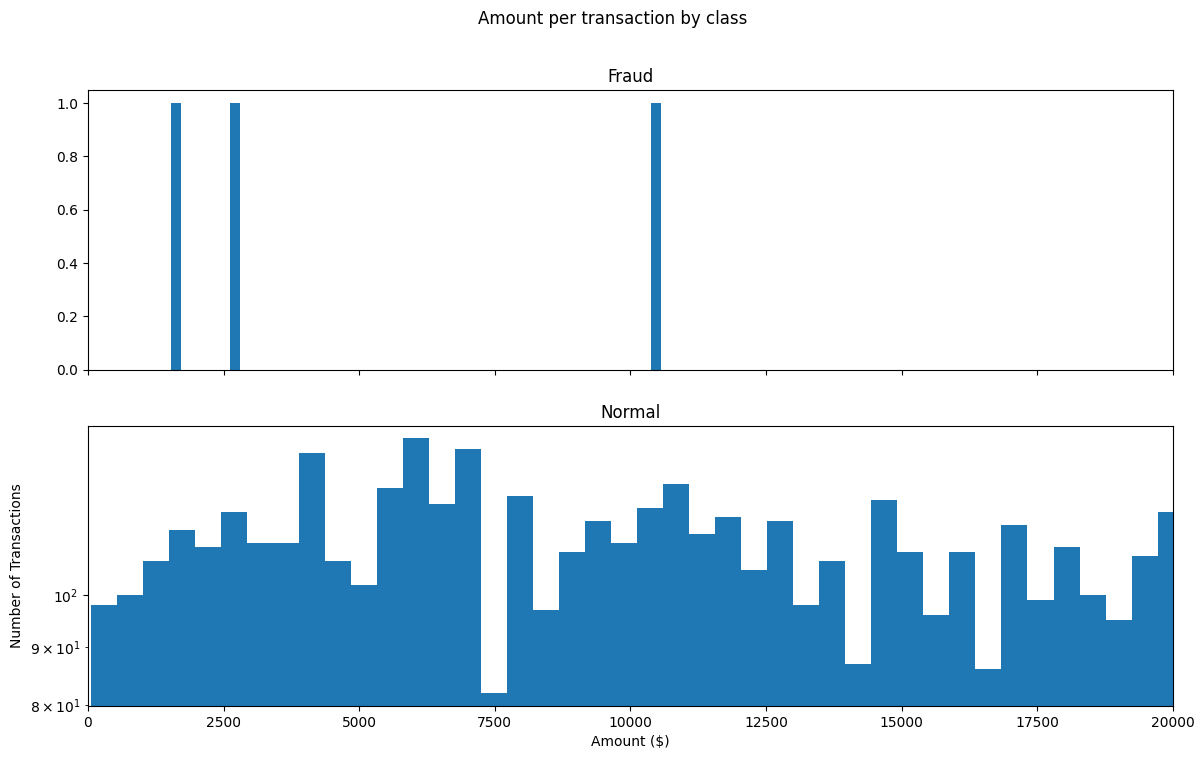

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [13]:
## Take some sample of the data

data1= data.sample(frac = 0.1,random_state=1)

data1.shape

(552, 31)

In [14]:

data.shape

(5523, 31)

In [15]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [16]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0
Fraud Cases : 0
Valid Cases : 552


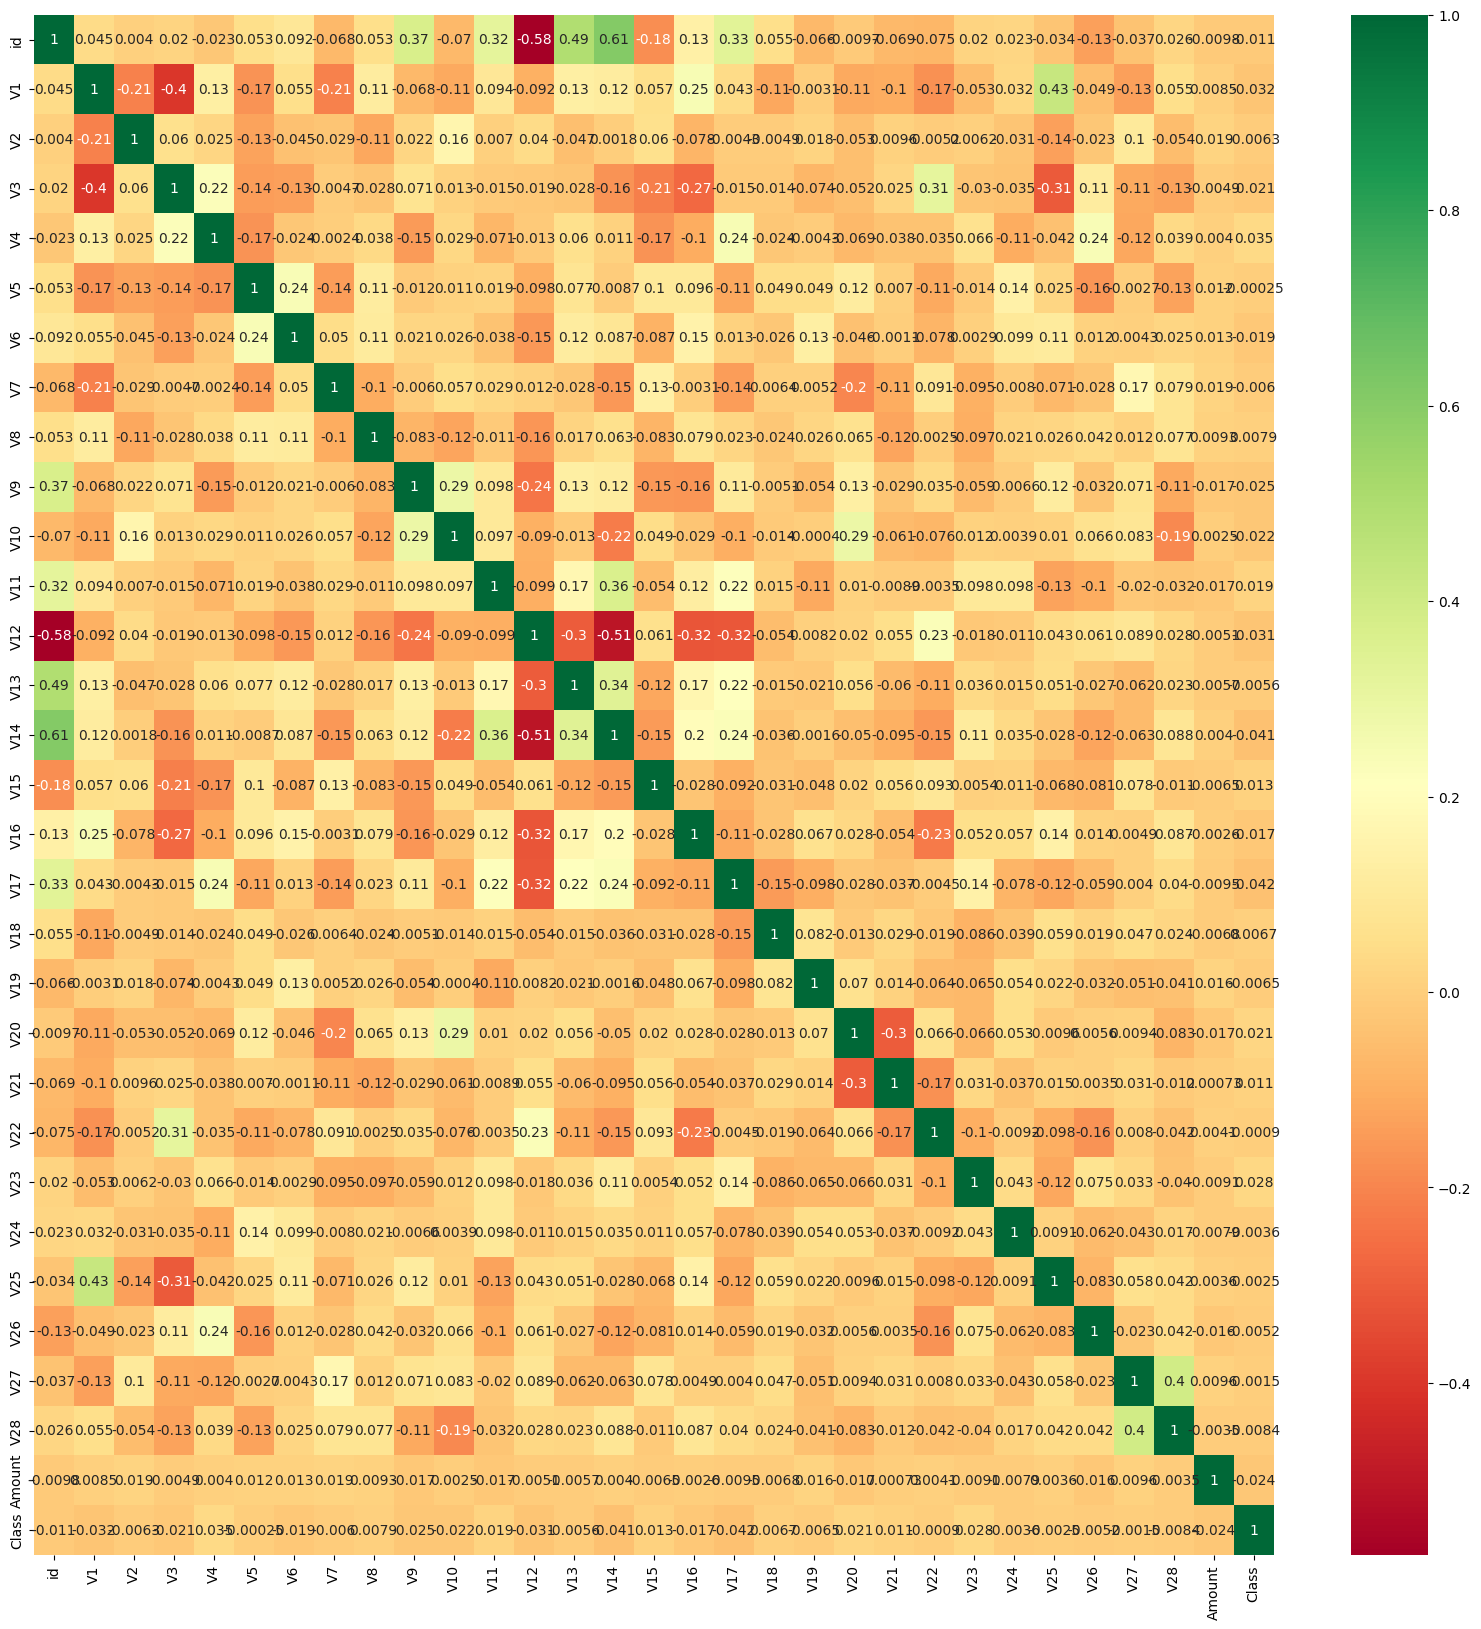

In [17]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [18]:
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting
target = "Class"
# Define a random state
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(552, 30)
(552,)
